1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [1]:
import numpy as np
import pandas as pd
from scipy import linalg as la
import matplotlib.pyplot as plt

In [2]:
seed = 2054778
np.random.seed(seed)

In [3]:
# Initializing the dataset
size=1200
x1 = np.random.normal(loc=0, scale=1, size=size)
x2 = x1 + np.random.normal(loc=0, scale=3, size=size)
x3 = 2*x1 + x2

In [4]:
# Generating the dataset and the covariance matrix
data = pd.DataFrame(np.array([x1, x2, x3]).T)
data.columns=['x1','x2','x3']
cov_matrix = np.cov(data.T)
cov_matrix

array([[ 0.98506745,  0.83519979,  2.80533469],
       [ 0.83519979,  9.14214828, 10.81254786],
       [ 2.80533469, 10.81254786, 16.42321724]])

In [5]:
# Taking a peak at the data
data.head()

,x1,x2,x3
0,-1.194624,-2.846154,-5.235403
1,1.393093,-1.665427,1.120759
2,0.621671,-1.275064,-0.031723
3,1.109586,-5.693948,-3.474776
4,-0.845344,0.431943,-1.258746


In [6]:
# Checking the covariance matrix with the definition
np.allclose((data.T.dot(data))/(size-1), cov_matrix, 1e-2)

True

In [7]:
# Finding the eigenvalues and the eigenvectors with linalg.eig
l, V = np.linalg.eig(cov_matrix)

In [8]:
# Finding the eigenvalues and the eigenvectors with linalg.svd
U, spectrum, Vt = np.linalg.svd(data.T)
l_svd = spectrum**2/(size-1)
V_svd = U

In [9]:
#Looking at the values
print('The eigenvalues with eig are: \n', l)
print('\n The eigenvectors with eig are: \n', V)
print('\n The eigenvalues with svd are: \n', l_svd)
print('\n The eigenvectors with svd are: \n', V_svd)

The eigenvalues with eig are: 
 [2.45172327e+01 1.15936729e-15 2.03320027e+00]

 The eigenvectors with eig are: 
 [[-0.11691446 -0.81649658  0.56538867]
 [-0.57554241 -0.40824829 -0.70857905]
 [-0.80937133  0.40824829  0.42219828]]

 The eigenvalues with svd are: 
 [2.45904831e+01 2.03337157e+00 2.18534116e-31]

 The eigenvectors with svd are: 
 [[-0.11682553  0.56540705 -0.81649658]
 [-0.57565386 -0.70848851 -0.40824829]
 [-0.80930491  0.42232558  0.40824829]]


In [10]:
# Sorting the eigenvalues in descending order (and the eigenvectors with them)
sorting = np.argsort(l)
sorting_svd = np.argsort(l_svd)
l = l[sorting[::-1]]
V = V[:,sorting[::-1]]
l_svd = l_svd[sorting_svd[::-1]]
V_svd = V_svd[:,sorting_svd[::-1]]

In [11]:
#Looking at the sorted values
print('The eigenvalues with eig are: \n', l)
print('\n The eigenvectors with eig are: \n', V)
print('\n The eigenvalues with eig are: \n', l_svd)
print('\n The eigenvectors with eig are: \n', V_svd)

The eigenvalues with eig are: 
 [2.45172327e+01 2.03320027e+00 1.15936729e-15]

 The eigenvectors with eig are: 
 [[-0.11691446  0.56538867 -0.81649658]
 [-0.57554241 -0.70857905 -0.40824829]
 [-0.80937133  0.42219828  0.40824829]]

 The eigenvalues with eig are: 
 [2.45904831e+01 2.03337157e+00 2.18534116e-31]

 The eigenvectors with eig are: 
 [[-0.11682553  0.56540705 -0.81649658]
 [-0.57565386 -0.70848851 -0.40824829]
 [-0.80930491  0.42232558  0.40824829]]


In [12]:
# Checking if the the eigenvectors  and eigenvalues yelded by the two methods coincide
print('Eigenvectors:', np.allclose(V, V_svd, 1e-3),'Eigenvalues: ', np.allclose(l, l_svd, 1e-2))


Eigenvectors: True Eigenvalues:  True


In [13]:
# From here we procede only with the values given by the eig method
percentages = l/cov_matrix.trace()
print(f'The percentage of the variability for each feature is: ', percentages)

The percentage of the variability for each feature is:  [9.23421201e-01 7.65787991e-02 4.36666058e-17]


The features with the highest percentages are $x_1$ and $x_2$, and the lowest is $x_3$. This make sense as the last feature is built ad a linear combination of the other two.

In [14]:
# Here we look for the features to drop to retain 99% of the variability
first_to_drop = 0
for i in range(len(percentages)):
    if np.cumsum(percentages[::-1][:i+1])[-1] > 1e-2:
        first_to_drop = len(percentages)-i
        break
print('The first index to drop is: ', first_to_drop)

The first index to drop is:  2


In [15]:
# Here we rotate the data and take a peak at that
datap = pd.DataFrame(np.dot(V.T, data.T)).T
datap.head()

,0,1,2
0,6.015136,-0.869080,4.025948e-16
1,-0.111459,2.440908,-3.533776e-15
2,0.686847,1.241576,-1.785505e-15
3,5.959766,3.194915,-4.879989e-15
4,0.869024,-1.315454,1.742279e-15


In [16]:
# Here we drop the features we marked early to retain 99% of the variability
datapp = datap.iloc[:,:first_to_drop]
datapp.head()


,0,1
0,6.015136,-0.869080
1,-0.111459,2.440908
2,0.686847,1.241576
3,5.959766,3.194915
4,0.869024,-1.315454


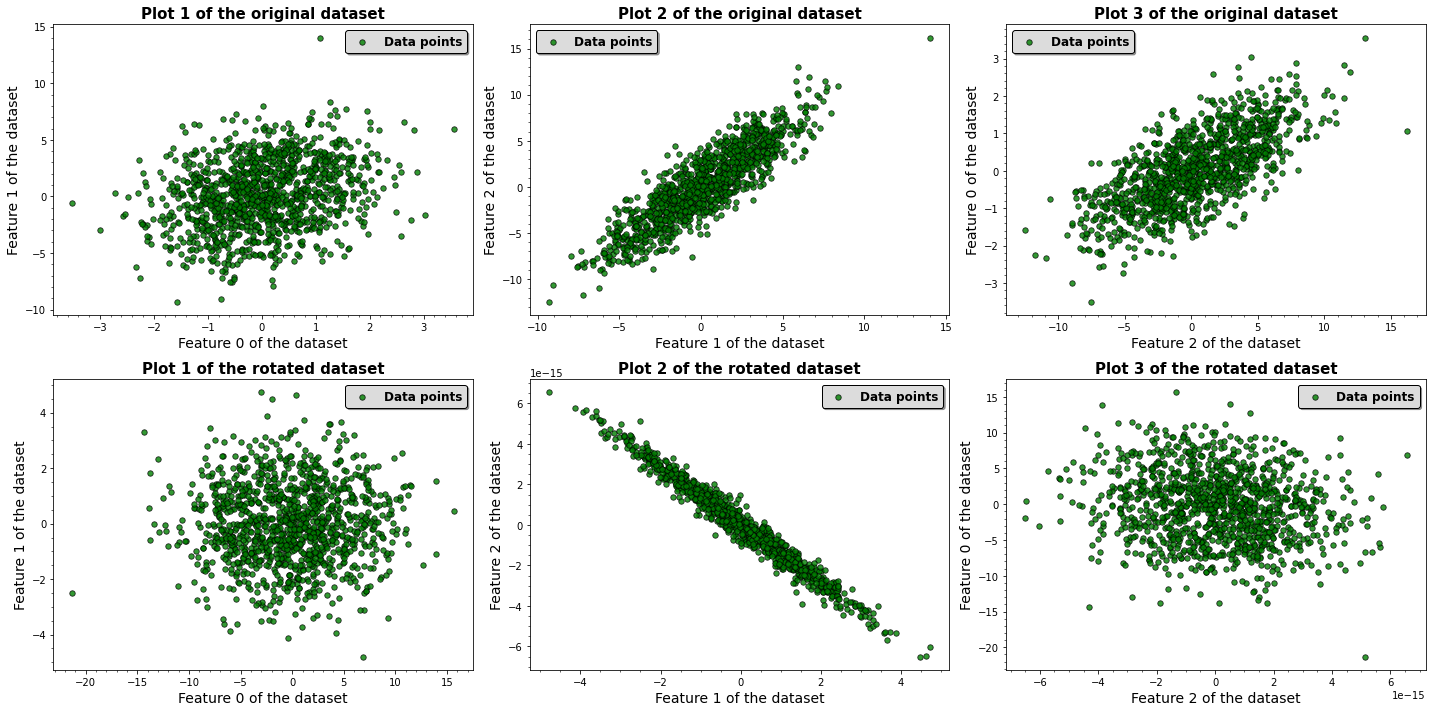

In [17]:
# Now we make the plots
fig, ax = plt.subplots(nrows= 2, ncols=3, figsize=(20, 10))
for j in range(3):
    ax[0, j].scatter(x=data.iloc[:,j], y=data.iloc[:,(j+1)%3], s=30, c='green', edgecolors='black', linewidths=0.8, alpha=0.8, label='Data points')
    ax[0, j].set_xlabel(f'Feature {j} of the dataset', fontsize=14)
    ax[0, j].set_ylabel(f'Feature {(j+1)%3} of the dataset', fontsize=14)
    ax[0, j].minorticks_on()
    ax[0, j].set_title(f'Plot {j+1} of the original dataset', fontsize=15, weight='bold')
    ax[0, j].legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'weight':'bold', 'size':'12'})
    
    
for j in range(3):
    ax[1, j].scatter(x=datap.T.loc[j,:], y=datap.T.loc[(j+1)%3,:], s=30, c='green', edgecolors='black', linewidths=0.8, alpha=0.8, label='Data points')
    ax[1, j].set_xlabel(f'Feature {j} of the dataset', fontsize=14)
    ax[1, j].set_ylabel(f'Feature {(j+1)%3} of the dataset', fontsize=14)
    ax[1, j].minorticks_on()
    ax[1, j].set_title(f'Plot {j+1} of the rotated dataset', fontsize=15, weight='bold')
    ax[1, j].legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'weight':'bold', 'size':'12'})
fig.tight_layout()

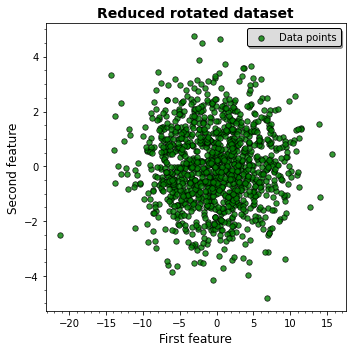

In [18]:
# We replot the remaining features (after reducing the dimensionality)
fig, ax = plt.subplots(nrows= 1, ncols=1, figsize=(5, 5))
ax.scatter(x=datapp.T.loc[0,:], y=datapp.T.loc[1,:], s=30, c='green', edgecolors='black', linewidths=0.8, alpha=0.8, label='Data points')
ax.set_xlabel('First feature', fontsize=12)
ax.set_ylabel('Second feature', fontsize=12)
ax.minorticks_on()
ax.set_title(f'Reduced rotated dataset', fontsize=14, weight='bold')
ax.legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black')
fig.tight_layout()

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [19]:
# Here we generate the noises
for i in range(3, 13):
    data[i] = np.random.normal(loc=0, scale=1/np.random.randint(35,65), size=size)

In [20]:
# We look at the data
data.head()

,x1,x2,x3,3,4,5,6,7,8,9,10,11,12
0,-1.194624,-2.846154,-5.235403,-0.045752,-0.022968,0.004590,-0.018585,0.003014,0.009844,-0.001094,0.001472,-0.004675,-0.018610
1,1.393093,-1.665427,1.120759,0.030488,-0.011995,0.000846,-0.023751,-0.043446,0.003072,0.007094,0.028427,0.004184,0.015720
2,0.621671,-1.275064,-0.031723,0.013658,-0.004159,0.031885,-0.027458,0.022374,-0.016761,0.001448,0.023994,-0.005017,-0.000200
3,1.109586,-5.693948,-3.474776,0.014207,-0.008440,0.002294,0.024681,-0.014869,-0.025606,0.004082,-0.002739,-0.010347,-0.028586
4,-0.845344,0.431943,-1.258746,-0.019349,0.007846,-0.060190,-0.004620,-0.019096,-0.020799,0.002428,-0.021526,0.008200,-0.013888


In [21]:
# We find the eigenvalues and the covariance matrix
cov_matrix = np.cov(data.T)
cov_matrix.shape

(13, 13)

In [22]:
l, V = np.linalg.eig(cov_matrix)

In [23]:
print('The eigenvalues with eig are: \n', l)
print('\n The eigenvectors with eig are: \n', V[:2])

The eigenvalues with eig are: 
 [2.45172439e+01 2.03320537e+00 7.63055715e-17 2.84221393e-04
 3.32698698e-04 8.44354221e-04 7.66225750e-04 7.51819208e-04
 6.87543836e-04 6.30353314e-04 4.75140669e-04 5.13212396e-04
 5.21453949e-04]

 The eigenvectors with eig are: 
 [[ 1.16914407e-01 -5.65388019e-01 -8.16496581e-01  1.13142677e-04
  -8.25030126e-05  6.52011455e-04  6.14810011e-05 -2.13876361e-04
  -3.60798657e-04  1.03877684e-04 -4.38424210e-05  3.25384033e-04
   1.09863338e-05]
 [ 5.75542309e-01  7.08577855e-01 -4.08248290e-01  4.14535749e-05
   1.81220208e-04 -8.51708488e-04  5.42532978e-05  3.32962132e-04
   8.04416505e-04 -6.93350806e-05 -7.35539601e-05 -4.98122764e-04
  -1.69097628e-04]]


In [24]:
sorting = np.argsort(l)
sorting_svd = np.argsort(l_svd)
l = l[sorting[::-1]]
V = V[:,sorting[::-1]]

In [25]:
percentages = l/cov_matrix.trace()
print(f'The percentage of the variability for each feature is:\n ', percentages)

The percentage of the variability for each feature is:
  [9.23219133e-01 7.65621985e-02 3.17949266e-05 2.88529279e-05
 2.83104365e-05 2.58900889e-05 2.37365277e-05 1.96358230e-05
 1.93254798e-05 1.78918543e-05 1.25280723e-05 1.07026152e-05
 2.87335574e-18]


In [26]:
first_to_drop = 0
for i in range(len(percentages)):
    if np.cumsum(percentages[::-1][:i+1])[-1] > 1e-2:
        first_to_drop = len(percentages)-i
        break
print('The first index to drop is: ', first_to_drop)

The first index to drop is:  2


So even adding the other random features, the only ones needed to retain 99%
of the variability are the first two.

In [27]:
datap = pd.DataFrame(np.dot(V.T, data.T).T)
datap.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-6.015135,0.869109,0.022339,-0.037444,-0.015465,0.013543,0.029854,0.001209,0.004865,-0.009259,-0.008334,-0.005027,-5.334761e-15
1,0.111461,-2.440902,-0.015362,0.024605,0.007431,0.008491,0.006571,0.012245,0.054993,0.022281,-0.001934,-0.000528,3.378738e-16
2,-0.686853,-1.241608,-0.029532,-0.011124,0.010886,0.002531,0.008135,0.014582,0.018289,-0.034042,0.019433,0.001508,-2.221058e-16
3,-5.959770,-3.194941,0.005250,-0.005574,0.028464,0.005299,0.000814,0.005479,-0.013819,0.028589,0.023461,-0.000375,-4.005544e-15
4,-0.869026,1.315529,0.059934,0.020773,-0.002643,-0.007721,0.005874,-0.025660,-0.000467,0.016699,0.018459,0.001678,-1.114470e-15


In [28]:
datapp = datap.iloc[:,:first_to_drop]
datapp.head()

,0,1
0,-6.015135,0.869109
1,0.111461,-2.440902
2,-0.686853,-1.241608
3,-5.959770,-3.194941
4,-0.869026,1.315529


3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


In [29]:
# We generate the dataset
time_measurments = np.linspace(0, 120, 1200)
amplitude = 5
omega = 2
dataset = pd.DataFrame(time_measurments, columns=['time'])
dataset['x'] = amplitude*np.cos(omega*dataset['time'] + np.random.normal(loc=0, scale=1, size =1200))
dataset['y'] = np.random.normal(loc=0, scale=0.01, size =1200)
dataset.head(5)

,time,x,y
0,0.000000,2.853963,-0.009885
1,0.100083,0.459594,-0.007691
2,0.200167,-0.535208,0.020340
3,0.300250,4.933399,0.004059
4,0.400334,1.443935,-0.007015


In [30]:
#Passing to phi and theta
spring_height = 5
dataset['$\theta$'] = np.arctan(dataset['y']/dataset['x'])
dataset['$\phi$'] = np.arctan((np.sqrt(dataset['x']**2+dataset['y']**2)/spring_height))
dataset = dataset.drop(columns=['x', 'y','time'])
dataset.head()

,$\theta$,$\phi$
0,-0.003464,0.518669
1,-0.016733,0.091674
2,-0.037985,0.106712
3,0.000823,0.778694
4,-0.004858,0.281141


In [31]:
cov_matrix = np.cov(dataset.T)
cov_matrix

array([[0.00036426, 0.00028087],
       [0.00028087, 0.05716331]])

In [32]:
l, V = np.linalg.eig(cov_matrix)

In [33]:
#Looking at the values
print('The eigenvalues with eig are: \n', l)
print('\n The eigenvectors with eig \are: \n', V)

The eigenvalues with eig are: 
 [0.00036287 0.0571647 ]

 The eigenvectors with eig re: 
 [[-0.99998777 -0.00494476]
 [ 0.00494476 -0.99998777]]


In [34]:
# Sorting the eigenvalues in descending order (and the eigenvectors with them)
sorting = np.argsort(l)
sorting_svd = np.argsort(l_svd)
l = l[sorting[::-1]]
V = V[:,sorting[::-1]]

In [35]:
percentages = l/cov_matrix.trace()
print(f'The percentage of the variability for each feature is: ', percentages)

The percentage of the variability for each feature is:  [0.99369229 0.00630771]


In [36]:
#To retain 90% of the variablility
first_to_drop = 0
for i in range(len(percentages)):
    if np.cumsum(percentages[::-1][:i+1])[-1] > 1e-1:
        first_to_drop = len(percentages)-i
        break
print('The first index to drop is: ', first_to_drop)

The first index to drop is:  1


In [37]:
datap = pd.DataFrame(np.dot(V.T, dataset.T).T)
datap.head()

,0,1
0,-0.518646,0.006028
1,-0.091590,0.017186
2,-0.106523,0.038513
3,-0.778688,0.003028
4,-0.281114,0.006248


In [38]:
datapp = datap.iloc[:,:first_to_drop]
datapp.head()

,0
0,-0.518646
1,-0.091590
2,-0.106523
3,-0.778688
4,-0.281114


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [39]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P /Users/tommaso/Desktop/MagistraleI/Python/LaboratoryOfComputationalPhysics_Y4/lab_data//
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P /Users/tommaso/Desktop/MagistraleI/Python/LaboratoryOfComputationalPhysics_Y4/lab_data// 
    
    
    
    
    

In [40]:
df=pd.read_csv('/Users/tommaso/Desktop/MagistraleI/Python/LaboratoryOfComputationalPhysics_Y4/lab_data/magic04.data', header=None)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [41]:
file_name='/Users/tommaso/Desktop/MagistraleI/Python/LaboratoryOfComputationalPhysics_Y4/lab_data/magic04.names'
with open(file_name, mode='r') as f:
    for line in f:
        print (line)

1. Title of Database: MAGIC gamma telescope data 2004



2. Sources:



   (a) Original owner of the database:



       R. K. Bock

       Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC)

       http://wwwmagic.mppmu.mpg.de

       rkb@mail.cern.ch



   (b) Donor:



       P. Savicky

       Institute of Computer Science, AS of CR

       Czech Republic

       savicky@cs.cas.cz



   (c) Date received: May 2007



3. Past Usage:



   (a) Bock, R.K., Chilingarian, A., Gaug, M., Hakl, F., Hengstebeck, T.,

       Jirina, M., Klaschka, J., Kotrc, E., Savicky, P., Towers, S.,

       Vaicilius, A., Wittek W. (2004).

       Methods for multidimensional event classification: a case study

       using images from a Cherenkov gamma-ray telescope.

       Nucl.Instr.Meth. A, 516, pp. 511-528.



   (b) P. Savicky, E. Kotrc.

       Experimental Study of Leaf Confidences for Random Forest.

       Proceedings of COMPSTAT 2004, In: Computational Statistics.

       (Ed.

In [42]:
df.columns = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df.head(5)



,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [43]:
cov_matrix = np.cov(df.iloc[:,:-1].T)
cov_matrix.shape


(10, 10)

In [44]:
l, V = np.linalg.eig(cov_matrix)

In [45]:
sorting = np.argsort(l)
sorting_svd = np.argsort(l_svd)
l = l[sorting[::-1]]
V = V[:,sorting[::-1]]

In [46]:
percentages = l/cov_matrix.trace()
print(f'The percentage of the variability for each feature is:\n ', percentages)

The percentage of the variability for each feature is:
  [4.40472832e-01 2.57990739e-01 1.34983305e-01 8.88176474e-02
 4.08479378e-02 2.90265516e-02 7.85446025e-03 5.78367077e-06
 7.18728859e-07 2.57947768e-08]


In [47]:
first_to_drop = 0
for i in range(len(percentages)):
    if np.cumsum(percentages[::-1][:i+1])[-1] > 1e-2:
        first_to_drop = len(percentages)-i
        break
print('The first index to drop is: ', first_to_drop)

The first index to drop is:  6


In [48]:
datap = pd.DataFrame(np.dot(V.T, df.iloc[:,:-1].T).T)
datap['class'] = df['class']
datap.head()


,0,1,2,3,4,5,6,7,8,9,class
0,-66.770898,55.598192,-13.782929,23.910855,-48.094253,-9.214111,-2.965775,-1.988366,-1.348682,0.110405,g
1,-174.588255,109.891592,-33.987128,-7.499934,-27.852709,-11.070329,0.790826,-1.645922,-1.493061,0.035337,g
2,-243.440502,111.280406,-162.323113,158.011234,-84.034269,-48.769028,-64.164079,-1.422655,-1.420320,0.093817,g
3,-97.933588,58.003670,-42.243997,4.311444,-20.074677,-8.227096,0.864271,-1.631393,-1.515425,0.065159,g
4,-331.900019,145.558113,-40.844236,-7.840250,-39.158539,20.131992,-1.603987,-1.826953,-1.433084,0.094436,g


In [49]:
datapp = datap.iloc[:,:first_to_drop]
datapp['class'] = df['class']
datapp.head()

,0,1,2,3,4,5,class
0,-66.770898,55.598192,-13.782929,23.910855,-48.094253,-9.214111,g
1,-174.588255,109.891592,-33.987128,-7.499934,-27.852709,-11.070329,g
2,-243.440502,111.280406,-162.323113,158.011234,-84.034269,-48.769028,g
3,-97.933588,58.003670,-42.243997,4.311444,-20.074677,-8.227096,g
4,-331.900019,145.558113,-40.844236,-7.840250,-39.158539,20.131992,g
